#### 1. Загрузка данных и первичный осмотр
1.1. Импортировать необходимые библиотеки

In [1]:
# Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.2. Загрузить учебный датасет в pandas.DataFrame с помощью pd.read_csv (или другого подходящего метода).

In [2]:
df = pd.read_csv('S02-hw-dataset.csv')

1.3. Вывести:
- первые строки датасета (head()),
- информацию о столбцах и типах (info()),
- базовые описательные статистики (describe() или аналог).

In [3]:
df.head() # df.head() по умолчанию передаёт только первые 5 строк

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
df.info() # получение информации о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
df.describe() # Передаёт базовые описательные статистики

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


#### 2. Пропуски, дубликаты и базовый контроль качества
2.1. Посчитать долю пропусков в каждом столбце (например, через isna().mean() или аналог).

In [6]:
df.isna().mean() # Передаёт значение доли пропусков в каждом столбце

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

2.2. Проверить наличие полностью дублирующих строк (через duplicated()).

In [7]:
df.duplicated() # Проверка на наличие полностью дублирующихся строк

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

2.3. Найти и вывести «подозрительные» случаи, исходя из смысла датасета. Примеры:
- отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);

In [8]:
df[df['age'] < 0] # Проверка на отрицательный возраст

,user_id,age,country,purchases,revenue


In [9]:
df[df['purchases'] < 0] # Проверка на отрицательное значение кол-ва покупок

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [10]:
df[df['revenue'] < 0] # Проверка на отрицательное значение дохода

,user_id,age,country,purchases,revenue


- нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);

In [11]:
df[df['age']>100] # Поиск возраста больше 100

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [12]:
df[(df['revenue'] == 0) & (df['purchases'] > 0)] # Проверка на нулевой доход при ненулевых количествах покупок

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


- другие логические противоречия, характерные для конкретного датасета.

In [13]:
df[(df['revenue'] > 0) & (df['purchases'] == 0)] # Проверка на нулевое количество покупок при ненулевом доходе

,user_id,age,country,purchases,revenue


2.4. Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены.

-------

Была найдена одна строка с отрицательным значением в столбце кол-ва покупок, по столбцам возраста и дохода таких значений не было найдено.

При проверке на нереалистичные значения была найдена одна строка с возрастом больше 100, а также одна строка с нулевым доходом при ненулевых количествах покупок. Была проведена дополнительная проверка на нулевое количество покупок при ненулевом доходе, ничего найдено не было.

#### 3. Базовый EDA: группировки, агрегаты и частоты
3.1. Посчитать частоты для одной или двух категориальных переменных (например, value_counts() для столбца с категорией/страной/классом).

In [14]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [15]:
df['age'].value_counts()

age
24.0     5
52.0     2
31.0     2
39.0     2
28.0     2
35.0     2
47.0     2
32.0     2
20.0     1
25.0     1
46.0     1
120.0    1
22.0     1
57.0     1
36.0     1
5.0      1
33.0     1
42.0     1
21.0     1
54.0     1
43.0     1
55.0     1
26.0     1
23.0     1
45.0     1
51.0     1
18.0     1
34.0     1
Name: count, dtype: int64

3.2. Выполнить хотя бы одну осмысленную группировку с агрегатами через groupby:
например, среднее и сумму по количественным признакам в разрезе категорий.

In [16]:
# Группировка по стране с агрегатами
country_stats = df.groupby('country').agg({'purchases': ['mean', 'sum'],
                                           'revenue': ['mean', 'sum']
}).round(2)

country_stats

purchases      revenue       
             mean sum     mean    sum
country                              
CN           4.50   9  1054.00   2108
DE           6.50  39  1445.50   8673
FR           4.25  51   675.92   8111
RU           4.77  62   790.08  10271
US           4.62  37   557.38   4459

3.3. При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).

In [17]:
# Определяем границы возрастных интервалов (bins)
age_bins = [0, 18, 25, 45, 65, 100, 150]
age_labels = ['0-18', '19-25', '26-45', '46-65', '65-100', '100+']

# Создаём новый столбец age_group с категориями
df['age_group'] = pd.cut(
    df['age'],              # Что разбиваем
    bins=age_bins,          # Границы интервалов
    labels=age_labels,      # Подписи интервалов
    right=True,             # Правая граница включена (по умолчанию)
    include_lowest=True     # Включаем самое маленькое значение в первый интервал
)

age_group_stats = df.groupby('age_group', observed=True).agg({'purchases': ['count', 'mean', 'sum'],
                                                              'revenue': ['mean', 'sum']}).round(2)
age_group_stats

purchases            revenue       
              count  mean sum     mean    sum
age_group                                    
0-18              2  6.00  12  1296.00   2592
19-25            10  5.00  50   581.60   5816
26-45            17  4.88  83  1003.00  17051
46-65             9  4.33  39   605.78   5452
100+              1 -1.00  -1   785.00    785

3.4. Кратко (1-2 абзаца) описать текстом основные наблюдения:
- какие категории доминируют,
- как отличаются группы по средним значениям,
- есть ли неожиданные эффекты.

-------

В датасете по возрастным группам доминируют пользователи 26-45 лет: на них приходится наибольшее число записей (17), наибольшая суммарная выручка (17 051), а также наибольшое кол-во покупок (83).
По средним значениям видно, что самые высокие средние покупки и выручка приходятся на группы 0-18 и 26-45 лет. 

Неожиданный эффект - возрастная группа 100+ содержит аномальную запись: один пользователь с возрастом 120 лет, отрицательным средним количеством покупок (-1) и всё же положительной выручкой 785, что указывает на явные ошибки в данных.

#### 4. Визуализация данных в Matplotlib
В том же ноутбуке `HW02.ipynb` нужно построить как минимум:

*Желательно снабдить графики краткими текстовыми комментариями:*
- что именно показано;
- какие выводы можно сделать.

4.1. Одну гистограмму для количественного признака:
- осмысленный выбор числа корзин (bins),
- подписи осей и заголовок.

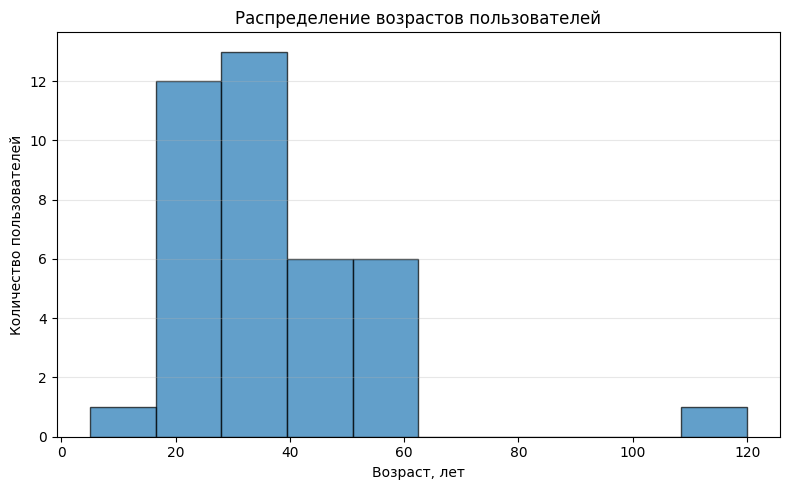

In [18]:
plt.figure(figsize=(8, 5))

plt.hist(df['age'].dropna(), bins=10, edgecolor='black', alpha=0.7)

plt.title('Распределение возрастов пользователей')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('saved_figures/hist_purchases_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

На гистограмме показано распределение пользователей по возрасту: по горизонтали отложены значения возраста, по вертикали - сколько пользователей попало в каждый возрастной интервал. 

Большинство пользователей находятся в диапазоне примерно от 20 до 60 лет, пики частоты приходятся на промежуток 20-40 лет. На графике видно, что есть отдельные редкие значения на краях распределения, включая аномально высокий возраст (около 120 лет).

4.2. Один боксплот (boxplot) для количественного признака:

- можно как общий, так и по группам (например, по категориям),
- подписи оси и заголовок.

<Figure size 800x500 with 0 Axes>

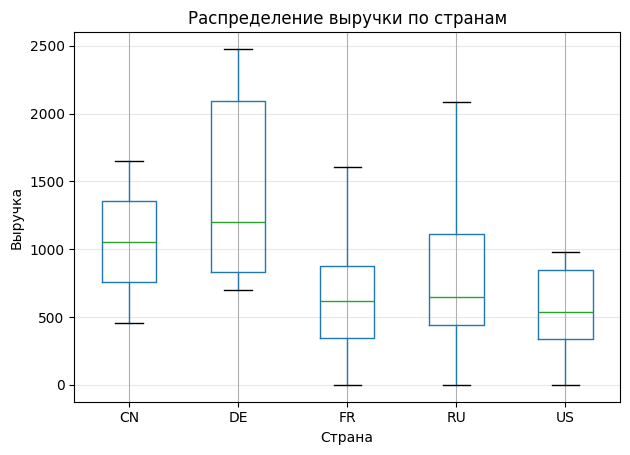

In [19]:
plt.figure(figsize=(8, 5))

# Строим boxplot выручки по странам
df.boxplot(column='revenue', by='country')

plt.title('Распределение выручки по странам')
plt.suptitle('')  # убираем автоматический заголовок
plt.xlabel('Страна')
plt.ylabel('Выручка')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('saved_figures/boxplot_purchases_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

На графике показано распределение выручки по пользователям внутри каждой страны: медиана, разброс значений и возможные выбросы. 

По графику видно, что выручка в DE в среднем выше и более вариативна за счёт крупных значений, тогда как в CN и US значения более компактны, а в FR и RU разброс умеренный, но присутствуют как низкие, так и довольно высокие уровни выручки.

4.3. Один scatter plot (диаграмма рассеяния) для пары количественных признаков:

- подписи обеих осей,
- заголовок,
- при желании можно добавить цвет/легенду для различения категорий.

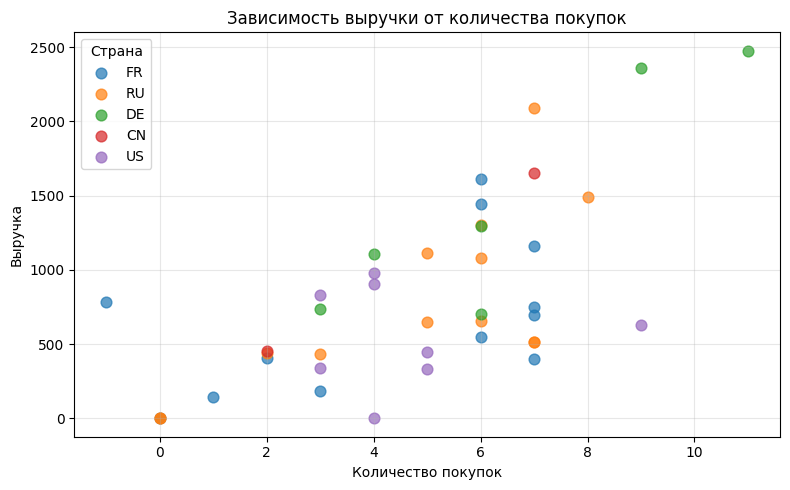

In [20]:
plt.figure(figsize=(8, 5))

countries = df['country'].unique()
colors = {'FR': 'tab:blue',
          'RU': 'tab:orange',
          'DE': 'tab:green',
          'CN': 'tab:red',
          'US': 'tab:purple'}

for c in countries:
    subset = df[df['country'] == c]
    plt.scatter(
        subset['purchases'],
        subset['revenue'],
        label=c,
        alpha=0.7,
        s=60,
        color=colors.get(c, 'gray')
    )

plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.grid(alpha=0.3)
plt.legend(title='Страна')

plt.tight_layout()
plt.savefig('saved_figures/scatter_purchases_revenue.png', dpi=300, bbox_inches='tight')
plt.show()


Этот график показывает, как связана выручка с количеством покупок для отдельных пользователей, причём цвет точек соответствует стране. По оси X - количество покупок, по оси Y - общая выручка.

По графику видно, что у разных стран и пользователей при одинаковом числе покупок выручка может существенно отличаться, а также присутствуют аномальные точки, например с нулевой выручкой при четырёх покупках.

4.4. Сохранить минимум один из построенных графиков в папку homeworks/HW02/figures/:

- использовать plt.savefig(...) или аналог;
- убедиться, что файл действительно появляется в репозитории и может быть открыт отдельно от ноутбука.

-------

Ищите графики в папочке `saved_figures`